# Churn Modelling with Machine Learning
### Vanita Thompson

<a id = "1"></a>
## 1. Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns#visualization
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
from plotly.offline import init_notebook_mode, iplot
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from plotly.offline import init_notebook_mode, iplot
import numpy as np

<a id = "2"></a>
## 2. Load and Prepare Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Vthomps000/Datalot_Project/main/Churn%20Data/Churn_Modelling.csv?token=AOM4NSOR4GKMEAZWD5UWW6LB234EK")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<a id = "3"></a>
## 3. EDA

In [3]:
# Taking a look at the shape of the dataset
df.shape

(10000, 14)

It consists of 14 columns and 10000 rows. Next, I would like to look deeper at each unique variable.

In [4]:
# Taking a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(f"Dataset Length: {len(df)}")

for col in df.columns:
    print(f"Unique Values for {col}: {len(set(df[col]))}" )

Dataset Length: 10000
Unique Values for RowNumber: 10000
Unique Values for CustomerId: 10000
Unique Values for Surname: 2932
Unique Values for CreditScore: 460
Unique Values for Geography: 3
Unique Values for Gender: 2
Unique Values for Age: 70
Unique Values for Tenure: 11
Unique Values for Balance: 6382
Unique Values for NumOfProducts: 4
Unique Values for HasCrCard: 2
Unique Values for IsActiveMember: 2
Unique Values for EstimatedSalary: 9999
Unique Values for Exited: 2


We produced some initial insights trying to identify the cardinality of the data:

high cardinality columns are columns with values that are very uncommon or unique (surname, balance).
low cardinality columns have very few unique values and their values are typically status flags, boolean or major classifications such as gender.


There are no missing values in the dataset, so no need to dropna or impute the data! Below, I will take a look at some statistics for the data. To get a better picture of the sample I am working with.

In [6]:
# Brief statistics about the data
df.describe().T.style.bar(
    subset=['mean'],
    color='#606ff2').background_gradient(
    subset=['std'], cmap='PuBu').background_gradient(subset=['50%'], cmap='PuBu')

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000000,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
CustomerId,10000.000000,15690940.569400,71936.186123,15565701.000000,15628528.250000,15690738.000000,15753233.750000,15815690.000000
CreditScore,10000.000000,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Age,10000.000000,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.000000,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.000000,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.000000,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.000000,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.000000,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.000000,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000


### Age
- **Mean** age of people is about <span style="color: teal">39</span>

- **The youngest** person is <span style="color: teal">18</span> years old

- **The oldest** person is <span style="color: teal">92</span> years old

### Estimated Salary
- **Mean** estimated salary of people is about <span style="color: teal">$100090</span>

- **Max** estimated salary of people is about <span style="color: teal">$199992</span>

- **Min** estimated salary of people is about <span style="color: teal">$12</span>

### Notes
- 20% of people exited
- 71% of people has credit card

Looking at the Estimated Salary, there appears to already be an outlier- the minimum salary of $12 doesn't make logical sense. I will use 'pandas_profiling' to further examine the dataset and see if there are any correlations.

<a id = "4"></a>
## 4. Data Preprocessing

<a id = "4_0"></a>
<h2 style="color:#005b96">4-0. Do we have any duplicate customers?</h2>

In [7]:
print("In this dataset from {all} customers, {num} of them are unique.".format(all = len(df) ,
                                                                               num = len(df.CustomerId.unique())))

In this dataset from 10000 customers, 10000 of them are unique.


<a id = "4_2"></a>
<h2 style="color:#005b96">4-1. Missing values:</h2>

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<h2 style="color:tomato">**No missing values so no need to dropna or impute**</h2>

<a id = "4_0"></a>
<h2 style="color:#005b96">4-2. How many customers do we have by country?</h2>

In [9]:
print("Geography unique values :" , '-'*25 , sep = '\n')
print(df.Geography.value_counts())

Geography unique values :
-------------------------
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [ ]:
data.drop(labels = ['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)

In [ ]:
data = pd.concat([pd.get_dummies(data['Geography']) , data] , axis = 1)
data.drop(labels = 'Geography' , axis = 1 , inplace = True)

In [ ]:
data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

<a id = "4_0"></a>
<h2 style="color:#005b96">4-4. Our Target Variable</h2>

- <h3 style="color:#009b96">Below, I count the entries of my target variable, the <u>Exited</u> column.</h3>
- <h3 style="color:#009b96">The departing customers are assumed to be 1 in the column Exited. Normally, I would verify this information, or make use of a key. However, I believe this is a fair estimate, so I will proceed with this assumption.</h3>

In [10]:
print("Exited unique values :" , '-'*25 , sep = '\n')
print(df.Exited.value_counts())

Exited unique values :
-------------------------
0    7963
1    2037
Name: Exited, dtype: int64


<a id = "5"></a>
## 5. More EDA and Visualization

### Distribution analysis of Churn and Non-Churn customers

- <h2 style="color:#009b96">In the following step I analyze the distributions of other variables for the Churn and No-Churn customers. This provides an insight into the data by identifying if the data contains outliers or if the dataset is unbalanced..</h2>
- <h3 style="color:tomato">Categorical data, such as gender or nationality, appears in a pie chart. On the other hand, numerical data such as credit score or balance is shown as a bar chart.</h3>

In [11]:
mpl.style.use('ggplot')
churn     = df[df["Exited"] == 1]
no_churn = df[df["Exited"] == 0]

In [12]:
import pandas as pd
import seaborn as sns#visualization
import plotly as py  
import plotly.tools as tls   
import plotly.graph_objs as go
import numpy as np 
#py.init_notebook_mode(connected=True)#visualization
#import plotly.graph_objs as go#visualization
#import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
churn     = df[df["Exited"] == 1]
not_churn = df[df["Exited"] == 0]

def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace2,trace1]
    fig  = go.Figure(data = data,layout = layout)
    #py.iplot(fig)
    fig.show()


#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace2,trace1]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    fig.show()
    
    #py.iplot(fig)
    
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Exited" ,ascending = False)
    classes = df["Exited"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Exited"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Exited"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "Tenure",
                                       values = df["Tenure"]),
                                  dict(label  = 'Balance',
                                       values = df['Balance']),
                                  dict(label  = 'EstimatedSalary',
                                       values = df['EstimatedSalary'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer attrition",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    #py.iplot(fig)
    fig.show()

    
cat_cols = ["Geography", "Gender", "NumOfProducts","HasCrCard", "IsActiveMember"]
num_cols = ["Age", "Balance", "EstimatedSalary","CreditScore","Tenure"]
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)

Correlation Matrix - Identifying interactions 

In [13]:
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
fig.show()
#py.iplot(fig)

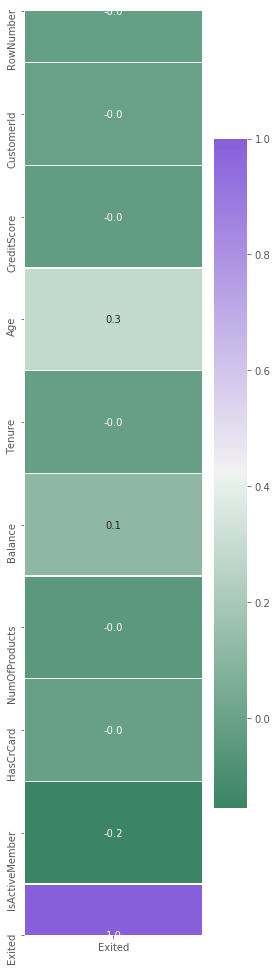

In [304]:
fig, ax = plt.subplots(figsize = (4, 17))

cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df[df.columns[0:12]].join(df.Exited).corr()[['Exited']], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#sns.set(font_scale=4)

#plt.savefig("heatmap_fe_1.png");

#created at a correlation heatmap of my new features in relation to Exited, looking at the first 13 features

- <h3 style="color:#009b96">The 'Exited' column has a <u>positive correlation</u> with 'Age and Balance', and a ,<u>negative correlation</u> with 'IsActiveMember and NumberOfProducts'. </h3>
- <h3 style="color:#009b96">This can help determine which are the most important features for our problem.</h3>

In [43]:
# Visualization
#------------------
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import font_manager as plt_fnt
import seaborn as sns
from matplotlib import rcParams as mplParams
from matplotlib import lines
from matplotlib.legend import Legend
import numpy as np


## Preparing Data for PCA

In [15]:
##updated drop the row number pca needs surmame in scatter and surname and customeid in the Id_col
def clean(df):
  
  # Drop irelative features
    result = df.drop(['RowNumber'], axis = 1)
    # One Hot Encoding
    result = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first = True)
    
    return result

In [16]:
clean_df2 = clean(df)
clean_df2.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
data_cleaned = clean_df2.drop(['RowNumber'],axis = 1)

In [18]:
data_cleaned.head()

,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
# convert columns into int
data_cleaned2 = data_cleaned.astype({"Geography_Germany": int, "Geography_Spain": int, "Gender_Male": int,})

<h2 style="color:#005b96">EDA: Principal Component Analysis (PCA):</h2>

- <h3 style="color:tomato">PCA is an unsupervised learning technique  for identifying patterns and clusters, and reducing the dimensionality of a dataset.</h3>
- <h3 style="color:#009b96">Considering that our dataset has 14 columns of which 3 are for identification (RowNumber, CustomerId, Surname) and 1 is the value we want to predict (Exited) we are left with 9 columns. </h3>
- <h3 style="color:#009b96">Visualizing something using 9 dimensions is quite difficult. Therefore, we can simplify this complexity by reducing the dimensionality of the dataset using PCA.
</h3>
- <h3 style="color:#009b96">From the visualizations we can understand that there’s not a clear linear separation between the Churn and Non-Churn customers. This allows us to exclude linear classifiers from our experiment.Maybe there is a problem in services of the products.</h3>

In [20]:
##Working PCA GRAPH
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, normalize

pca = PCA(n_components = 2)
Id_col = ["Surname", "CustomerId"]
target_col = ["Exited"]
X = data_cleaned2[[i for i in data_cleaned2.columns if i not in Id_col + target_col]]
Xscal = scale(X)
Xnorm = normalize(X)
Y = data_cleaned2[target_col + Id_col]


def plot(X,Y, title):

    principal_components = pca.fit_transform(X)
    pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
    pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
    pca_data["Churn"] = pca_data["Exited"].replace({1:"Churn",0:"Not Churn"})

    
    def pca_scatter(target,color) :
        tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                            y = pca_data[pca_data["Churn"] == target]["PC2"],
                            name = target,mode = "markers",
                            marker = dict(color = color,
                                          line = dict(width = .5),
                                          symbol =  "diamond-open"),
                            text = ("Customer Id : " + 
                                    pca_data[pca_data["Churn"] == target]['Surname'])
                           )
        return tracer

    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "principal component 1",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "principal component 2",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    trace1 = pca_scatter("Churn",'red')
    trace2 = pca_scatter("Not Churn",'royalblue')
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    #py.iplot(fig)
    fig.show()

#plot(X,Y, "Visualizing data with Principal Component Analysis on raw data")
#plot(Xnorm,Y, "Visualizing data with Principal Component Analysis on normalized data")
plot(Xscal,Y, "Visualizing data with Principal Component Analysis on scaled data")

## KDE

<a id = "4_3"></a>
<h2 style="color:#005b96">5.0 Encoding:</h2>

- Geography --> OneHotEncoding
- Gender    --> LabelEncoding
- Drop Identity Columns

In [21]:
#Prepare data for KDE
data = pd.concat([pd.get_dummies(df['Geography']) , df] , axis = 1)
data.drop(labels = ['RowNumber' , 'CustomerId' , 'Surname'] , axis = 1 , inplace = True)
data.drop(labels = 'Geography' , axis = 1 , inplace = True)

In [22]:
data['Gender'].replace({'Male':1 , 'Female':0} , inplace = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   France           10000 non-null  uint8  
 1   Germany          10000 non-null  uint8  
 2   Spain            10000 non-null  uint8  
 3   CreditScore      10000 non-null  int64  
 4   Gender           10000 non-null  int64  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 810.7 KB


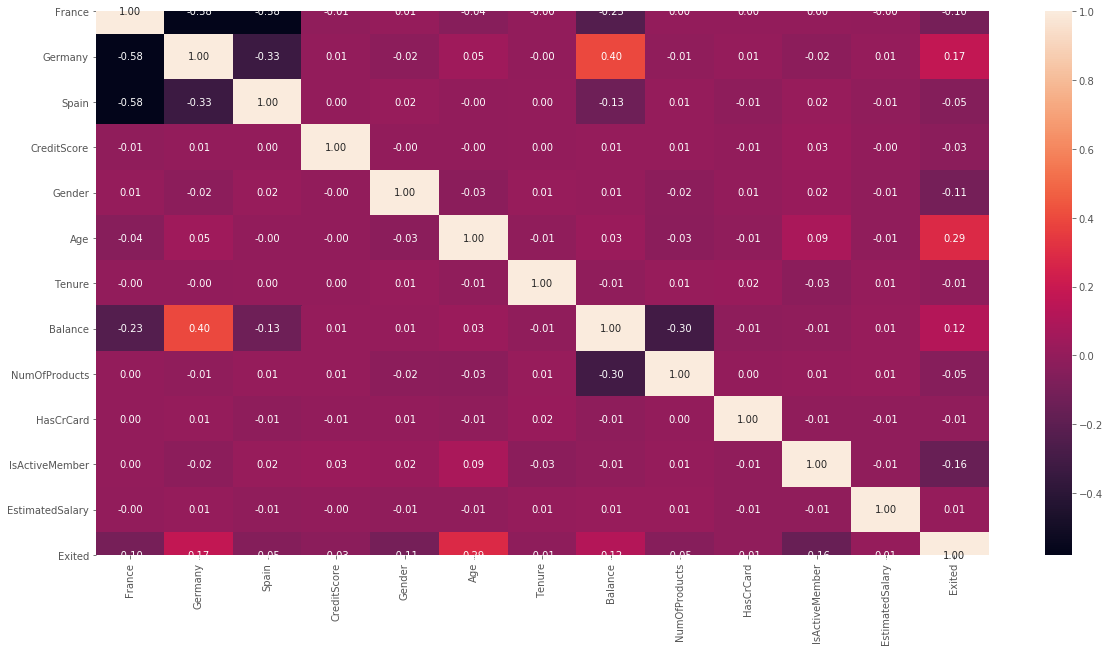

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(data = data.corr() , cmap = 'rocket' , annot = True , fmt = '.2f')
plt.show()

<h2 style="color:#005b96">5-1. Heat map results :</h2>

- <h3 style="color:#009b96">There is not a strong <u>linear relation</u> between target and input features.</h3>
- <h3 style="color:#009b96">But between all the input features, age, belonging to Germany, being an active member and balance are more linearly related to the target.</h3>

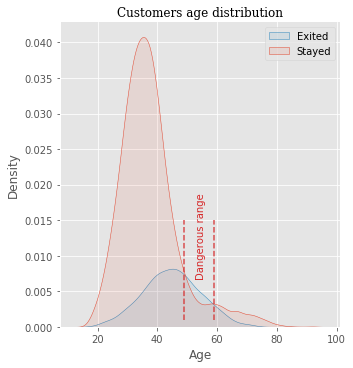

In [25]:
age_kernel_exited = data[data.Exited == 1]['Age'].mode()[0]
age_kernel_stayed = data[data.Exited == 0]['Age'].mode()[0]
sns.displot(data = data , x = 'Age' , hue = 'Exited' , fill = True , kind = 'kde' , legend = False , alpha = 0.1)
plt.legend(labels = ['Exited' , 'Stayed'])
plt.plot([49 , 49] , [0.001,0.015] , linestyle = '--' , c = 'tab:red' , alpha = 0.8)
plt.plot([59 , 59] , [0.001,0.015] , linestyle = '--' , c = 'tab:red' , alpha = 0.8)
small_font = {'family':'serif' , 'size':12}
plt.title('Customers age distribution' , fontdict = small_font)
plt.text(53 , 0.007 ,'Dangerous range' , rotation = 90 , color ='tab:red')
plt.show()

<h2 style="color:#005b96">5-3. KDE results:</h2>

- <h3 style="color:#009b96">The plot is showing that approximately between 49 and 59 there is a <u>dangerous range.</u> </h3>
- <h3 style="color:#009b96">Which the number of exiting customers is more than the number of customers who stayed.</h3>
- <h3 style="color:#009b96">So there is a higher probability to lose a customer with age from 49 to 59 years old.</h3> 

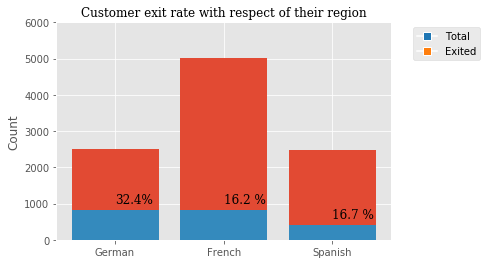

In [26]:
# by num_german --> i mean total german customers
num_german = len(data[data.Germany == 1])
num_french = len(data[data.France == 1])
num_spanish = len(data[data.Spain == 1])

# by ex_german --> i mean exited german customers
ex_german = len(data[(data.Germany == 1) & (data.Exited == 1)])
ex_french = len(data[(data.France == 1) & (data.Exited == 1)])
ex_spanish = len(data[(data.Spain == 1) & (data.Exited == 1)])

# by german_ex_rate --> i mean exit rate of german customers
german_ex_rate = ex_german/num_german
french_ex_rate = ex_french/num_french
spanish_ex_rate = ex_spanish/num_spanish

plt.ylim(0,6000)
plt.bar(x = ['German' , 'French' , 'Spanish'] , height = [num_german , num_french , num_spanish])
plt.bar(x = ['German' , 'French' , 'Spanish'] , height = [ex_german , ex_french , ex_spanish])

color_legend = {'Total':'tab:blue' , 'Exited':'tab:orange'}
handles = [Line2D([0], [0], marker='s', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in color_legend.items()]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')

small_font = {'family':'serif' , 'size':12}
plt.title('Customer exit rate with respect of their region' , fontdict = small_font)
plt.ylabel('Count')

small_font = {'family':'serif' , 'size':12}
plt.text('German' , 1000 , "{:.1f}%".format(german_ex_rate*100) , fontdict = small_font)
plt.text('French' , 1000 , "{:.1f} %".format(french_ex_rate*100) , fontdict = small_font)
plt.text('Spanish' , 600 , "{:.1f} %".format(spanish_ex_rate*100) , fontdict = small_font)

plt.show()

<h2 style="color:#005b96">5-4. Bar plot results:</h2>

- <h3 style="color:#009b96">Most of our customers are French.</h3>
- <h3 style="color:#009b96">German customers have the highest exit rate (32.4%).</h3>
- <h3 style="color:#009b96">So there is a higher probability to lose a German customer.</h3> 

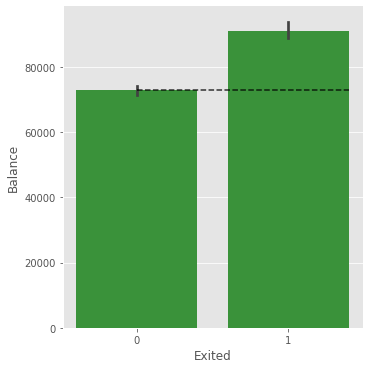

In [27]:
sns.catplot(data = data , x = 'Exited'  , y = 'Balance' , kind = 'bar' , color = 'tab:green')
plt.plot([0,1.4],[data[data.Exited == 0]['Balance'].mean(),data[data.Exited == 0]['Balance'].mean()],linestyle = '--' , c ='k'
         , alpha = 0.8)
plt.show()

<h2 style="color:#005b96">5-5. Bar plot results:</h2>

<h3 style="color:#009b96">It seems that exited customers are richer(due to their accounts not the estimated salary) !</h3>

In [28]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

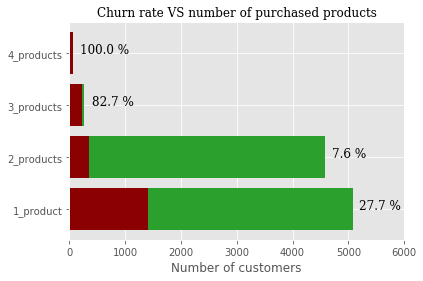

In [29]:
# num_p1 --> number of customers with 1 purchased product
num_p1 = len(data[data.NumOfProducts == 1])
num_p2 = len(data[data.NumOfProducts == 2])
num_p3 = len(data[data.NumOfProducts == 3])
num_p4 = len(data[data.NumOfProducts == 4])

# ex_p1 --> number of exited customers who purchased 1 product
ex_p1 = len(data[(data.NumOfProducts == 1) & (data.Exited == 1)])
ex_p2 = len(data[(data.NumOfProducts == 2) & (data.Exited == 1)]) 
ex_p3 = len(data[(data.NumOfProducts == 3) & (data.Exited == 1)])
ex_p4 = len(data[(data.NumOfProducts == 4) & (data.Exited == 1)])

p1_ex_rate = ex_p1/num_p1
p2_ex_rate = ex_p2/num_p2
p3_ex_rate = ex_p3/num_p3
p4_ex_rate = ex_p4/num_p4

plt.barh(y = ['1_product','2_products','3_products','4_products'] , width = [num_p1,num_p2,num_p3,num_p4], color = 'tab:green')
plt.barh(y = ['1_product','2_products','3_products','4_products'] , width = [ex_p1,ex_p2,ex_p3,ex_p4] , color = 'darkred')

plt.xlim(0,6000)

plt.text(200 , '4_products','{:.1f} %'.format(p4_ex_rate*100),fontdict = small_font)
plt.text(400 , '3_products','{:.1f} %'.format(p3_ex_rate*100),fontdict = small_font)
plt.text(4700 , '2_products','{:.1f} %'.format(p2_ex_rate*100),fontdict = small_font)
plt.text(5200 , '1_product','{:.1f} %'.format(p1_ex_rate*100), fontdict = small_font)

plt.title('Churn rate VS number of purchased products' , fontdict = small_font)
plt.xlabel('Number of customers')

plt.show()

<h2 style="color:#005b96">5-6. Bar plot results:</h2>

- <h3 style="color:tomato">It's too weird, that we losed all 60 customers who have purchased 4 products.</h3>
- <h3 style="color:#009b96">Also we have a big churn rate in customers who have have purchased 3 products.</h3>
- <h3 style="color:#009b96">More products are not satisfying the customers.</h3>
- <h3 style="color:#009b96">Maybe there is a problem in services of the products.</h3>

<a id = "6"></a>
## 6. Prepare Data for Machine learning

<a id = "6_1"></a>
<h2 style="color:#005b96">6-1. Train_test split:</h2>

In [33]:
x_set = data.iloc[:,:-1].values
y_set = data.iloc[:,-1]

x_train , x_test , y_train , y_test = train_test_split(x_set , y_set , test_size = 0.2 
                                                       , random_state = 1)

print("x_train shape -->", x_train.shape)
print("y_train shape -->",y_train.shape)
print("x_test shape  -->",x_test.shape)
print("y_test shape  -->",y_test.shape)

x_train shape --> (8000, 12)
y_train shape --> (8000,)
x_test shape  --> (2000, 12)
y_test shape  --> (2000,)


<a id = "6_2"></a>
<h2 style="color:#005b96">6-2. Scaling:</h2>

In [34]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<a id = "6_3"></a>
<h2 style="color:#005b96">6_3. SMOTE (a.k.a. synthetic minority over-sampling technique):</h2>

In [36]:
oversample = SMOTE(random_state = 1 , k_neighbors = 5)
x_train_resample , y_train_resample = oversample.fit_resample(x_train , y_train)

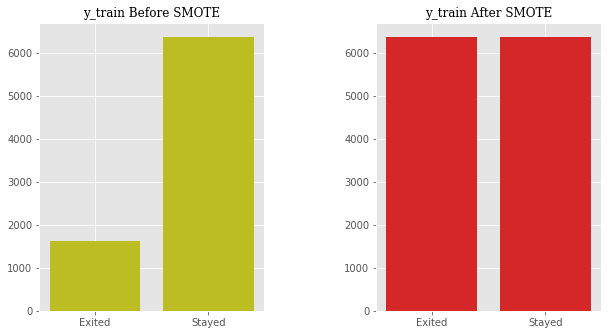

In [44]:
# org_true --> original true class (1)
org_true = 0
org_false = 0

# ovr_true --> over_sampled true class
ovr_true = 0
ovr_false = 0

for item in y_train:
    if item == 1:
        org_true += 1
    elif item == 0:
        org_false += 1

for item in y_train_resample:
    if item == 1:
        ovr_true += 1
    elif item == 0:
        ovr_false += 1
        
small_font = {'family':'serif' , 'size':12}
plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.5 , hspace = None)
plt.subplot(1,2,1)
plt.bar(x = ['Exited' , 'Stayed'] , height = [org_true , org_false] , color = 'tab:olive')
plt.title('y_train Before SMOTE', fontdict = small_font)

plt.subplot(1,2,2)
plt.bar(x = ['Exited' , 'Stayed'] , height = [ovr_true , ovr_false] , color = 'tab:red')
plt.title('y_train After SMOTE' , fontdict = small_font)
plt.show()

- <h3 style="color:#009b96">Until now we have our train and test sets ready.</h3>
- <h3 style="color:#009b96">But the distribution of y_train is imbalanced (you will see it a few steps later).</h3>
- <h3 style="color:#009b96">This makes machine learning classifier tends to be more biased towards the majority class.</h3>
- <h3 style="color:#009b96">There are some techniques to solve this problem, here i will use SMOTE.</h3>

<h2 style="color:tomato">Note :</h2>
<h3 style="color:tomato">For a robust evaluation, there isn't any synthetic sample in the test set !</h3>

<a id = "7_1_2"></a>
<h2 style="color:#005b96">7_1_2. What's the effect of SMOTE ?</h2>

- <h2 style="color:#009b96">As you see we have got better accuracy without SMOTE.</h2>
- <h2 style="color:tomato">So is SMOTE making the result worse ???</h2>
- <h2 style="color:tomato">The answer is NO!</h2>
<h2 style="color:#009b96">Let's take a look at the confusion matrices :</h2>

In [31]:
# Some Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Evalouation
from sklearn.metrics import classification_report

# Algorithms
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Prevent Warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Preprocessing
#------------------
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Models
#------------------
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier



# Evaluation
from sklearn import metrics

<a id = "7"></a>
## 7. Train the model

<a id = "7_1"></a>
<h2 style="color:#005b96">7_1. Logistic regression</h2>

In [46]:
# lr_org --> logistic regression with original trainset
lr_org = LogisticRegression()
lr_org.fit(x_train , y_train)
pred_lr_org = lr_org.predict(x_test)

# lr_ovr --> Logistic regression with oversampled trainset
lr_ovr = LogisticRegression()
lr_ovr.fit(x_train_resample , y_train_resample)
pred_lr_ovr = lr_ovr.predict(x_test)

lr_org_acc = metrics.accuracy_score(y_test , pred_lr_org)
lr_ovr_acc = metrics.accuracy_score(y_test , pred_lr_ovr)
print("Logistic regression trained with original trainset --> accuracy of prediction on test = {:.3f}".format(lr_org_acc))
print("Logistic regression trained with oversampled trainset --> accuracy of prediction on test = {:.3f}".format(lr_ovr_acc))

Logistic regression trained with original trainset --> accuracy of prediction on test = 0.812
Logistic regression trained with oversampled trainset --> accuracy of prediction on test = 0.723


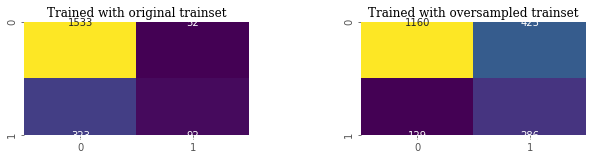

In [47]:
plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.3 , top = 2 , wspace = 0.5 , hspace = None)

plt.subplot(1,2,1)
plt.title('Trained with original trainset' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , pred_lr_org) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.subplot(1,2,2)
plt.title('Trained with oversampled trainset' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test , pred_lr_ovr) , annot = True , fmt = '.0f' , cmap = 'viridis'
           , cbar = False , square = True)



plt.show()

- <h2 style="color:#009b96">Imagine that we are the owner of this business, we want to find exiting customers,
it's not really important for us to predict a customer that will stay (in real scenario), as an exiting customer (a.k.a. FN or false negative).</h2>
- <h2 style="color:#009b96">But it will be costly for us, if we predict a customer that  will exit ( in real scenario), as an staying customer (a.k.a. FP or false positive).</h2>
- <h2 style="color:tomato">So we conclude that in this problem FP is more important for us.</h2>
- <h3 style="color:tomato">So we should also use another evaluation parameter named precision ( TP / (TP + FP) )</h3>
<h2 style="color:tomato">Let's compare the precisions :</h2>

In [49]:
print("In logistic regression:" , end = '\n'+'-'*20+'\n')
print("Precision with original trainset = {:.3f}".format(metrics.precision_score(y_test , pred_lr_org , average = None)[0]))
print("Precision with oversampled trainset = {:.3f}".format(metrics.precision_score(y_test , pred_lr_ovr , average = None)[0]))

In logistic regression:
--------------------
Precision with original trainset = 0.826
Precision with oversampled trainset = 0.900


- <h2 style="color:tomato">As you see in the above cell, the precision is better with oversampling (that's what we wanted !).</h2>
<h3 style = "color: #009b96">So from here i will continue training models with the oversampled trainset . . .</h3>

<a id = "7_2"></a>
<h2 style="color:#005b96">7.2. KNN classifier</h2>

In [50]:
knc = KNeighborsClassifier() # the default hyper parameters
knc.fit(x_train_resample , y_train_resample)
pred_knc = knc.predict(x_test)

knc_acc = metrics.accuracy_score(y_test , pred_knc)
# knc_pr --> k nearest classifer precision
knc_pr = metrics.precision_score(y_test , pred_knc , average = None)[0]

print("KNN classifier accuracy =" , knc_acc)
print("KNN precision =" , knc_pr)

KNN classifier accuracy = 0.7575
KNN precision = 0.8985507246376812


<a id = "7_8"></a>
<h2 style="color:#005b96">7.2 XGBoost</h2>

In [51]:
xgb = XGBClassifier(subsample = 0.9 , random_state = 1 , n_estimators = 1200 , max_depth = 15 , use_label_encoder = False
                   , learning_rate = 0.01 , gamma = 0.1)
xgb.fit(x_train_resample , y_train_resample)
pred_xgb = xgb.predict(x_test)

xgb_acc = metrics.accuracy_score(y_test , pred_xgb) 
xgb_pr = metrics.precision_score(y_test , pred_xgb , average = None)[0]

print("XGBoost classifier accuracy =" , xgb_acc)
print("XGBoost classifier precision =" , xgb_pr)

[13:39:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost classifier accuracy = 0.857
XGBoost classifier precision = 0.8863771564544913


<a id = "7_8"></a>
<h2 style="color:#005b96">7.3 Random Forest Classifier</h2>

In [52]:
rfc = RandomForestClassifier(random_state = 1 , max_depth = 15 , n_estimators = 1000)
rfc.fit(x_train_resample , y_train_resample)

pred_rfc_test = rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train_resample)

rfc_acc = metrics.accuracy_score(y_test , pred_rfc_test)
rfc_pr = metrics.precision_score(y_test , pred_rfc_test , average = None)[0]
rfc_acc_train = metrics.accuracy_score(y_train_resample , pred_rfc_train)

print("-"*10+"Test"+'-'*10)
print("Random forest accuracy =" , rfc_acc)
print("Random forest precision =" , rfc_pr)
print("-"*10+"Train"+'-'*10)
print("Random forest accuracy on trainset =",rfc_acc_train)

----------Test----------
Random forest accuracy = 0.84
Random forest precision = 0.9000632511068943
----------Train----------
Random forest accuracy on trainset = 0.98447789275635


<a id = "7_8"></a>
<h2 style="color:#005b96">7.4 Adaboost Classifier</h2>

In [58]:
ada = AdaBoostClassifier(learning_rate = 0.25 , n_estimators = 1200 , random_state = 1)
ada.fit(x_train_resample , y_train_resample)
pred_ada = ada.predict(x_test)

ada_acc = metrics.accuracy_score(y_test , pred_ada) 
ada_pr = metrics.precision_score(y_test , pred_ada , average = None)[0]

print("Ada boost accuracy =" , ada_acc)
print("Ada boost precision =" , ada_pr)

Ada boost accuracy = 0.8345
Ada boost precision = 0.9045161290322581


<a id = "7_8"></a>
<h2 style="color:#005b96">7.5 Support Vector Classifier - SVC</h2>

In [53]:
svc = SVC(C = 1 , gamma = 0.9 , kernel = 'rbf' , random_state = 1)
svc.fit(x_train_resample , y_train_resample)
pred_svc = svc.predict(x_test)

svc_acc = metrics.accuracy_score(y_test , pred_svc) 
svc_pr = metrics.precision_score(y_test , pred_svc , average = None)[0]

print("Support vector classifier accuracy =" , svc_acc)
print("Support vector classifier precision =" , svc_pr)

Support vector classifier accuracy = 0.7985
Support vector classifier precision = 0.85431654676259


<a id = "7_8"></a>
<h2 style="color:#005b96">7.6 Decision Tree Classifier </h2>

In [54]:
dt = DecisionTreeClassifier(min_samples_leaf = 87)
dt.fit(x_train_resample , y_train_resample)
pred_dt = dt.predict(x_test)

dt_acc = metrics.accuracy_score(y_test , pred_dt)
dt_pr = metrics.precision_score(y_test , pred_dt , average = None)[0]

print("Decision tree classifier accuracy =" , dt_acc)
print("Decision tree classifier precision =" , dt_pr)

Decision tree classifier accuracy = 0.815
Decision tree classifier precision = 0.9079919408999328


<a id = "7_8"></a>
<h2 style="color:#005b96">7.7 Gaussian Naive Bayes</h2>

In [55]:
gnb = GaussianNB() # the default hyper parameters
gnb.fit(x_train_resample , y_train_resample)
pred_gnb = gnb.predict(x_test)

gnb_acc = metrics.accuracy_score(y_test , pred_gnb)
gnb_pr = metrics.precision_score(y_test , pred_gnb , average = None)[0]

print("Gaussian naive bayes accuracy =" , gnb_acc)
print("Gaussian naive bayes precision =" , gnb_pr)

Gaussian naive bayes accuracy = 0.748
Gaussian naive bayes precision = 0.9000740192450037


<a id = "8_1"></a>
<h1 style="color:tomato">8_1. Models comparison</h1>

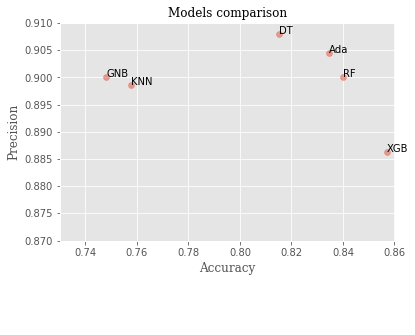

In [62]:
# x --> accuracies
# y --> precisions
labels = ["KNN" , "GNB" , "DT" , "SVC" , "RF" , "Ada" , "XGB"]
x = [knc_acc , gnb_acc , dt_acc , svc_acc , rfc_acc , ada_acc , xgb_acc]
y = [knc_pr , gnb_pr , dt_pr , svc_pr , rfc_pr , ada_pr , xgb_pr]

plt.xlim(0.73,0.86)
plt.ylim(0.87,0.91)

small_font = {'family':'serif' , 'size':12}
plt.title('Models comparison' , fontdict = small_font)
plt.xlabel('Accuracy' , fontdict = small_font)
plt.ylabel('Precision' , fontdict = small_font)

plt.scatter(x , y , alpha = 0.5)
for i in range(len(labels)):
    plt.annotate(labels[i] , (x[i] , y[i]))

- <h2 style="color:#009b96">With the above plot we can compare models with respect of accuracy and precision at the same time.</h2>
- <h2 style="color:#009b96">whatever the model is closer to the <u>top right corner</u>, its a better model for this problem.</h2>

In [61]:
eval_frame = pd.DataFrame()
eval_frame['Model'] = labels
eval_frame['Accuracy'] = x
eval_frame['Precision'] = y
eval_frame.sort_values('Accuracy' , ascending = False)

,Model,Accuracy,Precision
6,XGB,0.8570,0.886377
4,RF,0.8400,0.900063
5,Ada,0.8345,0.904516
2,DT,0.8150,0.907992
3,SVC,0.7985,0.854317
0,KNN,0.7575,0.898551
1,GNB,0.7480,0.900074


- <h2 style="color:#009b96">As you see in the above cell, XGB has the best accuracy among the other models.</h2>
- <h2 style="color:tomato">Remember that, not only the accuracy but also the precision is important for us in this problem, i mentioned that in part.</h2>
- <h2 style="color:#009b96">So because <u>XGB</u> has a better accuracy to precision ratio than RF, i will choose that as the best model among others.</h2>

<a id = "8_2"></a>
<h1 style="color:tomato">8_2. XGBoost confusion matrix</h1>

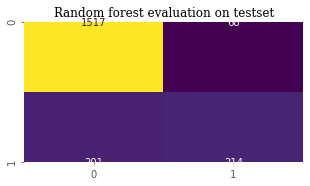

In [366]:
plt.figure(figsize = (5,5))
plt.title('Random forest evaluation on testset' , fontdict = small_font)
sns.heatmap(data = metrics.confusion_matrix(y_test2 , pred_xgb) , annot = True , fmt = '.0f' , cmap = 'viridis'
            , cbar = False , square = True)

plt.show()

<a id = "8_2"></a>
<h1 style="color:tomato">8_3. XGBoost Feature Importance and Prediction</h1>

In [65]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

xgb.fit(x_train_resample , y_train_resample)
preds = xgb.predict(x_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

#xgb.fit(x_train_resample , y_train_resample)



print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

[13:55:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Precision = 0.39625
Recall = 0.5
Accuracy = 0.7925


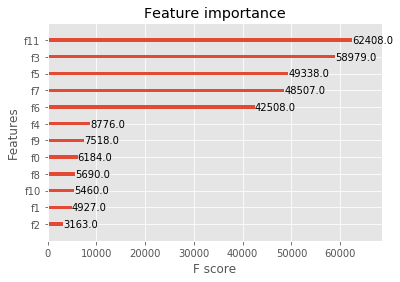

In [66]:

# Feature importance
from xgboost import plot_importance
plot_importance(xgb)

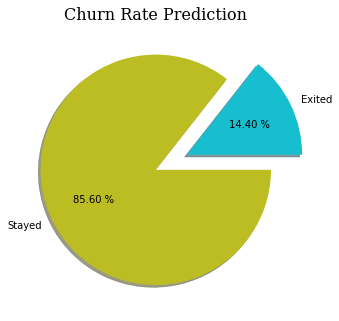

Text(0.5, 1.0, 'Churn Rate')

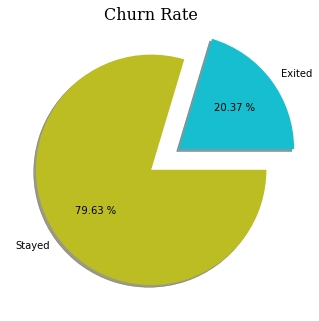

In [362]:
plt_fnt = {'family':'serif' , 'size':16}

plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.8 , top = 2 , wspace = 0.5 , hspace = None)
plt.subplot(1,2,1)
plt.pie(x = [len(pred_df[pred_df['Exit_Pred'] == 1]) , len(pred_df[pred_df['Exit_Pred'] == 0])]  , labels = ['Exited' , 'Stayed'],
       autopct = '%.2f %%' , shadow = True , explode = [0.3,0] , colors = ['tab:cyan' , 'tab:olive'])
plt.title("Churn Rate Prediction" , fontdict = plt_fnt)
plt.show()

plt_fnt = {'family':'serif' , 'size':16}

plt.subplots_adjust(left = 1 , bottom = 1 , right = 2.8 , top = 2 , wspace = 0.5 , hspace = None)
plt.subplot(1,2,2)
plt.pie(x = [len(data[data['Exited'] == 1]) , len(data[data['Exited'] == 0])]  , labels = ['Exited' , 'Stayed'],
       autopct = '%.2f %%' , shadow = True , explode = [0.3,0] , colors = ['tab:cyan' , 'tab:olive'])
plt.title("Churn Rate" , fontdict = plt_fnt)
